# Complex Networks

## Infectious Disease Spreading

In this project we choosed a real-world dataset about disease spreading and analyze it.
The dataset can be found in http://sing.stanford.edu/flu/

# The Dataset

### What is the dataset?
	
    The dataset is high-resolution temporal contact network related to the spread of infectious diseases via droplet 
    transmission.
    It represents the recording of single day of individual contacts in an American highschool.

### What is the network?
	
	The aggregate network for the entire day can be represented by a weighted undirected network.

	> Nodes (N) represent individuals wearing mote sensors.
	> Edges (E) represent contacts between the individuals. The edge weight represents the duration of the contact (in minutes)

	N = 788  (655 students, 73 teachers, 55 staff, and 5 other persons)
	E = 762,868 (total number of contacts, 94% coverage)


### How was the data collected?
	
    The data was collected using a wireless sensor network (TelosB motes) that detected when two people were within 
    range of one another.
	A contact was recorded if the distance between two individuals was less than or equal to 3 meters.
    The duration of the contact was also recorded.
	There was 94% coverage of the total school population's contacts.

### 1. Data Set Integration

We start by loading the dataset and transform it into a graph with networkx (https://networkx.github.io/documentation/stable/index.html).

In order to transform the dataset into a graph its important to understand what's inside it.

The population is composed by an entire school, representing 655 students, 73 teachers, 55 staff, and 5 other persons.
It contains 2,148,991 unique close proximity records (CPRs). A CPR represents one close (maximum of 3 m) proximity detection event between two motes. Thus, a contact exists between two motes if there is at least one interaction between them during the day, and the duration of the contact is the total duration of all interactions between these two motes. Because the beaconing frequency of a mote is 0.05 s−1, an interaction of length 3 (in CPRs) corresponds to an interaction of about 1 min (SI Text and references therein). The entire dataset consists of 762,868 interactions with a mean duration of 2.8 CPRs (∼1 min), or 118,291 contacts with mean duration of 18.1 CPRs (∼6 min).

The aggregate network for the entire day can be represented by a weighted undirected graph, wherein nodes represent indi- viduals and edges represent contacts (edges are weighted by contact duration).

### Inports and Folder Information

In [1]:
import os
import networkx as nx

dataset_root_path = "flu-data" # corpora
parameters_path = '/dropoff=0/minimumDuration=1/deltaT=1620/staticWeightedEdgeList_at=1350_min=540_max=2159.txt'
addThenChop_path = dataset_root_path + '/edgeLists/durationCondition/' + 'addThenChop' + parameters_path
chopThenAdd_path = dataset_root_path + '/edgeLists/durationCondition/' + 'chopThenAdd' + parameters_path
chopThenCount_path = dataset_root_path + '/edgeLists/durationCondition/' + 'chopThenCount' + parameters_path
justChop_path = dataset_root_path + '/edgeLists/durationCondition/' + 'justChop' + parameters_path

print(os.listdir(dataset_root_path)) # files that contain the dataset info

['moteFiles', 'edgeLists', 'README.txt', 'roles.txt']


In [3]:
"""
    Loads the nodes for the network
    Returns the sorted list of nodes
"""
def load_nodes():
    
    roles_file = open(dataset_root_path + "/roles.txt", 'r')
    roles = []
    
    for line in roles_file:
        id = int(line.split()[0])
        role = line.split()[1]
        roles.append((id, role))

    # TODO - Check why the hell the first 12 individuals have the same ID.
    # For now we eliminate the first 12 entries and get 789 roles shouldn't be 788 ?(655 + 73 + 55 + 5)
   
    roles = sorted(roles, key=lambda id: id)[12:] 
    return roles

"""
    Loads the edges
    Returns the list of edges
"""
def load_edges(contact_strategy_path):
    
    strategy_file = open(contact_strategy_path , 'r')
    
    edges = [] #starting with addThenChop strategy to define the edges.
    
    for line in strategy_file:
        id1 = int(line.split()[0])
        id2 = int(line.split()[1])
        weight = int(line.split()[2])
        edge = (id1, id2, weight)
        
        edges.append(edge)
    
    return edges

"""
    Returns the NetworkX network structure loaded with the nodes and edges
    Parameter contact_strategy_path - "contact strategy" folder specified (Default = addThenChop)
"""
def load_network(contact_strategy_path = addThenChop_path):
    
    network = nx.Graph()
    
    nodes = load_nodes()
    edges = load_edges(contact_strategy_path)
    
    N = len(nodes)
    E = len(edges)
    
    for i in range(1, N + 1):
        network.add_node(i)
        
    network.add_weighted_edges_from(edges)
    
    return network

network = load_network()

### 2. Network characteristics Analisys:

There is many metric to characterize a network.
In this section we explore some of them.

### Degree distribution:


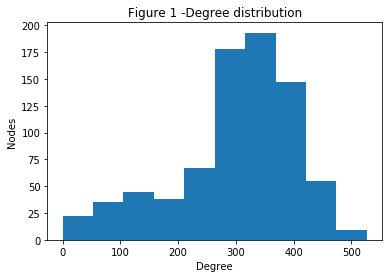

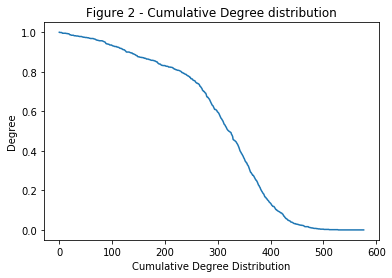

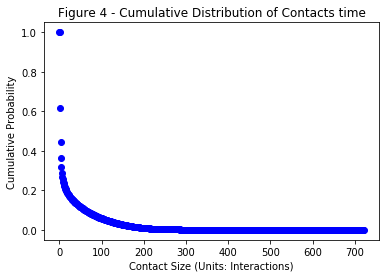

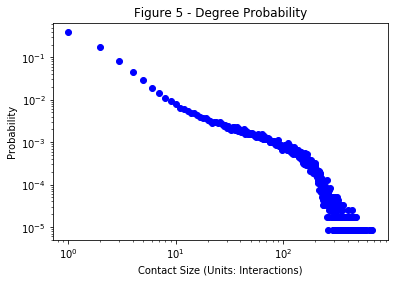

299.850443599493
5424.735107731305


In [4]:
import numpy as np
import matplotlib.pyplot as plt


"""
    This Function receives the network graph and plots the degree histogram. 
"""
def plotDegreeHistogram(network):
    degree = nx.degree(network)
    values = map(lambda x: x[1], degree)
    plt.hist(list(values))
    plt.xlabel("Degree")
    plt.ylabel("Nodes")
    plt.title("Figure 1 -Degree distribution")
    plt.show()


"""
    This Function receives the network graph and plots the cumulative degree distribution.
    The Cumulative degree distribution cum_Pk represents the fraction of nodes with degree higher than k.
"""
def plotCumulativeDist(network):
    degree = nx.degree(network)
    values = map(lambda x: x[1], degree)
    max_degree = max(values)
    
    cum_Pk = [0]*(max_degree+50) # + 50 so we can see the limit going to zero.
    k_values = [0]*(max_degree+50)
    for k in range(0, max_degree+50):
        k_values[k] = k
        cum_Pk[k] = len([i for i in list(map(lambda x: x[1], degree)) if i >= k]) / len(network.nodes())
    
    plt.xlabel("Cumulative Degree Distribution")
    plt.ylabel("Degree")
    plt.title("Figure 2 - Cumulative Degree distribution")
    plt.plot(k_values, cum_Pk)
    plt.show()
    

"""
    This Function receives the network graph and plots the degree probability Pk.
    The degree probability Pk represents the probability of a node has a degree  equal to k.
"""
def plotDegreeProbability(network):
    degree = nx.degree(network)
    values = map(lambda x: x[1], degree)
    max_degree = max(values)
    
    Pk = [0]*(max_degree+10) # + 10 so we can see the limit going to zero.
    k_values = [0]*(max_degree+10)
    for k in range(0, max_degree+10):
        k_values[k] = k
        Pk[k] = len([i for i in list(map(lambda x: x[1], degree)) if i == k]) / len(network.nodes())
    
    plt.xlabel("Degree")
    plt.ylabel("Degree probability")
    plt.title("Figure 3 - Degree Probability")
    plt.plot(k_values, Pk, 'bo')
    plt.show()

"""
    This Function receives the network graph and plots Cumulative Distribution of Contacts time.
    The Contact Size probability Pk represents the probability of an individual has a contact of size k.
"""
def plotSizeOfContactsCumDist(network):
    weights = []
    for (u,v,w) in network.edges(data='weight'):
        weights.append(w)
    
    max_size = max(weights)
    cum_Pk = [0]*(max_size+50) # + 50 so we can see the limit going to zero.
    k_values = [0]*(max_size+50)
    for k in range(0, max_size+50):
        k_values[k] = k
        cum_Pk[k] = len([i for i in weights if i >= k]) / len(weights)
    
    plt.xlabel("Contact Size (Units: Interactions)")
    plt.ylabel("Cumulative Probability")
    plt.title("Figure 4 - Cumulative Distribution of Contacts time")
    data_points, = plt.plot(k_values, cum_Pk, 'bo', label='Data Points')
    powerLaw, = plt.plot([x**-0.667 for x in k_values if x != 0.0], 'k', label='Pk ≈ k^-γ')
    plt.legend(handles=[data_points, powerLaw])
    
    plt.show()

def plotSizeOfContactsLogScale(network):
    weights = []
    for (u,v,w) in network.edges(data='weight'):
        weights.append(w)
    
    max_size = max(weights)
    Pk = [0]*(max_size+10) # + 10 so we can see the limit going to zero.
    k_values = [0]*(max_size+10)
    for k in range(0, max_size+10):
        k_values[k] = k
        Pk[k] = len([i for i in weights if i == k]) / len(weights)
    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Contact Size (Units: Interactions)")
    plt.ylabel("Probability")
    plt.title("Figure 5 - Degree Probability")
    plt.plot(k_values, Pk, 'bo')
    plt.show()

plotDegreeHistogram(network=network) # figure 1
plotCumulativeDist(network=network) # figure 2
#plotDegreeProbability(network=network) #NOT WHATS IS EXPECTED.... Power Law? # figure 3
plotSizeOfContactsCumDist(network=network) # figure 4
plotSizeOfContactsLogScale(network=network) # figure 5

degree = nx.degree(network)
degree_values = list(map(lambda x: x[1], degree))
average_degree = sum(degree_values)/len(degree_values)
print (average_degree)

degree = nx.degree(network, weight="weight")
degree_values = list(map(lambda x: x[1], degree))
average_weighted_degree = sum(degree_values)/len(degree_values)
print (average_weighted_degree )

####  Average Degree  =  299.850
#### Average Weighted Degree = 5424.735

Ignoring the weight of a contact we can see by figure 1 that there is a great number of people with 300/350 contacts per day.

Figure 2 gives us an idea of the how likely is for a person to have more than k contacts per day. We can see having a small number of contacts is unlikely but having more than 340 contacts is very unlikely too.

##### but are all contacts equal? What is the distribution of the size of a contact?

In order to see the distribution of the size of a contact we need to look to the weights that represent the sum of all interactions between 2 persons.

figure 4 show us a very interesting thing... The relation between the size of a contact and his probability is a power law! which means that as the size of the contact increases the more rare it becames.

The γ in this power law is ≈ 0.667. γ value is typically in the range 2 < γ < 3 for a scale free network


### Average Path Length (APL):
In order to compute this we had to remove node 548 because it was disconnected. Maybe that student was missing in that day.

#### Average Path Lenght is 1.6219 considering no weights.

#### Average Path Lenght is 1.8700 considering weights.  

The result without weights means that in average the distance between 2 pair is 1.6219, (in portuguese) em media uma pessoa não tem contacto com todas as outras pessoas, mas para todas aquelas com quem não teve contacto existe alguem (das que teve contacto) que teve contacto com essa pessoa (com quem não teve contacto).
(contact with ≈ 3/4 of the the total school population)

If we consider weights we are not looking for contacts but we are looking for Interactions which gives a clue of the size of the contacts too.
In average a person the distance between 2 pairs is 1.8700 Interactions. The fact that this number is higher than the one presented before is because the there is a lot of small contacts (> 3 Interactions for example). These metric not only measures the distance between 2 pair it will also multiply that distance by the weight (duration) of the links in the path between the pair.

APL shows that the network presents a small-world property. 

In [5]:
# this takes a while...
# Running this 2 times will generate an error.
#network.remove_node(548) # should we remove this node? its not connected with any other.... it's a student...
    
#apl_not_weighted = nx.average_shortest_path_length(network)
#apl_weighted = nx.average_shortest_path_length(network, weight="weight")

#apl_weighted = 1.8700778513793304 but actually there is A LOT of edges with weight = 1

### Clustering Coefficient:
"People tend to have friends who are also friends with each other"

#### Average CC without considering weights: 0.4988
#### Average CC considering weights: 0.0056

In [6]:
# this computatio takes a while

cc_not_weighted = nx.clustering(network)
cc_weighted = nx.clustering(network, weight='weight')
average_cc = sum(cc_not_weighted.values())/ len(cc_not_weighted.values())
average_cc_wighted = sum(cc_weighted.values())/ len(cc_weighted.values())


### 3. Node characteristics Analisys:

There is many metric to characterize a node.
In this section we explore some of them.

### Degree Centrality:
"how popular is a node?"

In [7]:
degree_centrality  = nx.degree_centrality(network)


max_centrality = max(degree_centrality.values())
min_centrality = min(degree_centrality.values())

max_id = 0# we want to know who is the most popular and whats the role associated.
min_id = 0
count=0
for key, value in degree_centrality.items():
    if value == max_centrality:
        max_id = key
    if value == min_centrality:
        min_id = key
        
max_centrality_role = load_nodes()[max_id]
min_centrality_role = load_nodes()[min_id]
print("Max degree centrality: %0.4f, Id and Role: %s" % (max_centrality, max_centrality_role))
print("Min degree centrality: %0.4f, Id and Role: %s" % (min_centrality, min_centrality_role))

Max degree centrality: 0.6688, Id and Role: (172, 'student')
Min degree centrality: 0.0000, Id and Role: (549, 'student')


In [ ]:
import operator
import time

start_time = time.time()
print("Start time = ", start_time)
clustering_coefficients = nx.clustering(network, weight = 'weight')
average_clustering_coefficient = nx.average_clustering(network, weight = 'weight')

min_node, min_clustering_coefficient = min(enumerate(clustering_coefficients.values()), key = operator.itemgetter(1))
max_node, max_clustering_coefficient = max(enumerate(clustering_coefficients.values()), key = operator.itemgetter(1))

run_time = time.time() - start_time
print("Total runtime=", run_time)
print("Average clustering coefficient: ", average_clustering_coefficient)
print("Node with lowest clustering coefficient: ", min_node, "(",min_clustering_coefficient,")")
print("Node with highest clustering coefficient: ", max_node, "(",max_clustering_coefficient,")")

### Eigenvector Centrality:
"my friends are better than yours"

In [9]:
#not implemen